In [7]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [8]:
dataDir=os.getcwd()
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
# initialize COCO api for instance annotations
coco=COCO(annFile)
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())


loading annotations into memory...
Done (t=0.70s)
creating index...
index created!


In [70]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
numimage=1
imginfos = coco.loadImgs(imgIds[numimage])[0]
imgIds
len(imgIds)

3

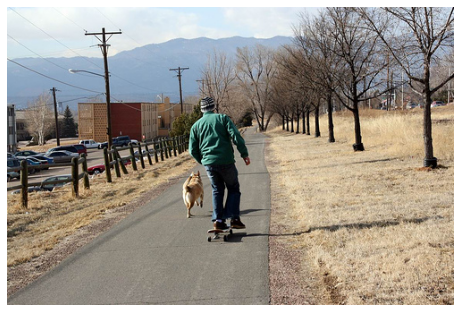

In [71]:
# load and display image
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,imginfos['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

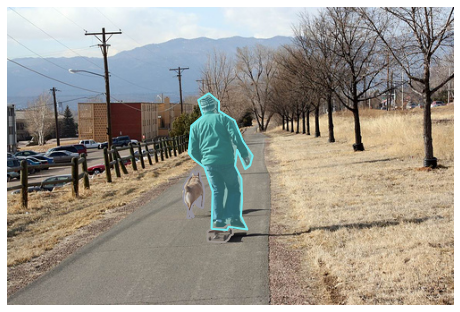

In [72]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=imginfos['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [74]:
#montrer les tailles des différentes aires
max=anns[0]
for a in anns:
    print("la catégorie numéro", a['category_id']," a pour aire", a['area'])
    if a['area'] > max['area']:
        max=a
print("la catégorie numéro", a['category_id']," a pour aire", a['area'],"max dans l'image")

la catégorie numéro 18  a pour aire 759.3375500000002
la catégorie numéro 41  a pour aire 409.74355
la catégorie numéro 1  a pour aire 5999.544500000001
la catégorie numéro 1  a pour aire 5999.544500000001 max dans l'image


In [75]:
coor=max['bbox']
coor=list(int(i) for i in coor) # arrondir les coordonnées des boîtes
I.shape
#Z=np.array()

(334, 500, 3)

In [81]:
z=coco.loadImgs(imgIds[numimage])
z[0]

{'license': 1,
 'file_name': '000000324158.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg',
 'height': 334,
 'width': 500,
 'date_captured': '2013-11-19 23:54:06',
 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg',
 'id': 324158}